In [ ]:
pip install qiskit

In [ ]:
pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
pip install librosa

In [ ]:
pip install NumPy

In [ ]:
pip install matplotlib

In [ ]:
pip install python-osc

In [ ]:
import librosa
import matplotlib.pyplot as plt

In [ ]:
import librosa.display

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive

In [ ]:
pip install flask-socketio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/ChopinWaltz.mp3'

In [ ]:
y, sr = librosa.load(file_path)
print(f"Audio file loaded. Duration: {len(y)/sr:.2f} seconds")
print(f"Sample rate: {sr} Hz")

Audio file loaded. Duration: 207.61 seconds
Sample rate: 22050 Hz


In [ ]:
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
melody= np.argmax(magnitudes, axis=0)
melody= librosa.hz_to_midi(melody)

/usr/local/lib/python3.10/dist-packages/librosa/core/convert.py:1095: RuntimeWarning: divide by zero encountered in log2
  midi: np.ndarray = 12 * (np.log2(np.asanyarray(frequencies)) - np.log2(440.0)) + 69


In [ ]:
y

array([1.6335398e-06, 1.8794555e-05, 1.1514174e-05, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [ ]:
melody_midi

array([26.10245366, 26.10245366, 26.10245366, ..., 30.14936125,
       32.07024621, 35.69923034])

In [ ]:
melody_midi=librosa.hz_to_midi(melody)
epsilon=1e-8
melody_midi= melody_midi+epsilon
melody_2d=melody_midi.reshape(1, -1)

/usr/local/lib/python3.10/dist-packages/librosa/core/convert.py:1095: RuntimeWarning: invalid value encountered in log2
  midi: np.ndarray = 12 * (np.log2(np.asanyarray(frequencies)) - np.log2(440.0)) + 69


In [ ]:
import math
for frame, i in enumerate(melody_2d):
  for element, j in enumerate(i):
    if math.isnan(j)==True:
      print(j);j==0.0
      i[element]=j
  melody_2d[frame]=i

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


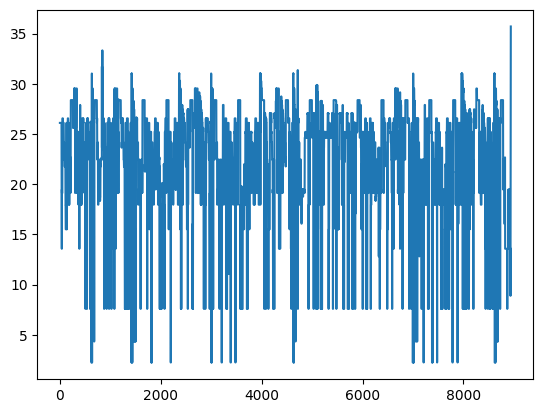

In [ ]:
melody_2d
plt.plot(melody_2d[0])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

In [ ]:
print(f"Audio duration: {librosa.get_duration(y=y, sr=sr):.2f} seconds")
print(f"sample rate: {sr} Hz")
print(f"Melody shape: {melody.shape}")

Audio duration: 207.61 seconds
sample rate: 22050 Hz
Melody shape: (8941,)


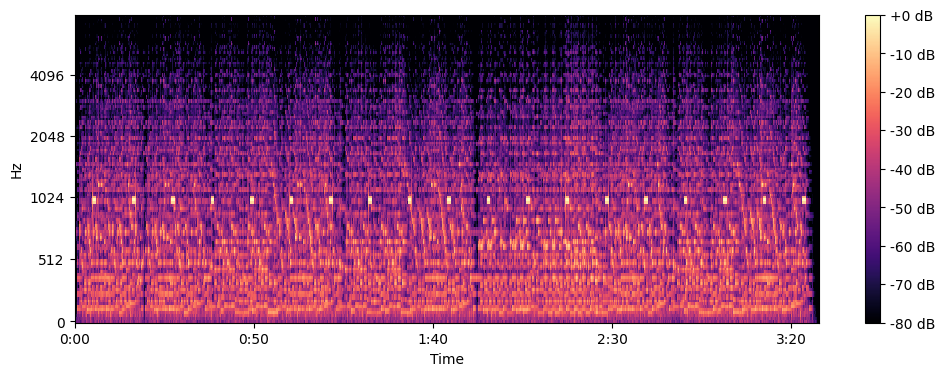

In [ ]:
S =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB= librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title=('Mel frequency spectrogram')
plt.show()


In [ ]:
file_path='/content/drive/ My Drive/ChopinWaltz.mp3'
y, sr=librosa.load(file_path)
pitches, magnitudes= librosa.piptrack(y=y, sr=sr)
melody=np.argmax(magnitudes, axis=0)
melody=librosa.hz_to_midi(melody)

In [ ]:
quantized_melody=np.digitize(melody, bins=np.linspace(melody.min(), melody.max(), 32))

In [ ]:
num_qubits=5
qr=QuantumRegister(num_qubits)
cr= ClassicalRegister(num_qubits)
qc=QuantumCircuit(qr, cr)

In [ ]:
for i, note in enumerate(quantized_melody[:30]):
  binary=format(note, f'0{num_qubits}b')
  for j , bit in enumerate(binary):
    if bit == '1':
      qc.x(qr[j])

  qc.barrier()

qc.measure(qr, cr)

print(qc)

      ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ »
q3_0: ┤ X ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░─»
      └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ »
q3_1: ──────░───────░───────░───────░───────░───────░───────░───────░───────░─»
            ░       ░       ░       ░       ░       ░       ░       ░       ░ »
q3_2: ──────░───────░───────░───────░───────░───────░───────░───────░───────░─»
            ░       ░       ░       ░       ░       ░       ░       ░       ░ »
q3_3: ──────░───────░───────░───────░───────░───────░───────░───────░───────░─»
            ░       ░       ░       ░       ░       ░       ░       ░       ░ »
q3_4: ──────░───────░───────░───────░───────░───────░───────░───────░───────░─»
            ░       ░       ░       ░       ░       ░       ░       ░       ░ »
c2: 5/════════════════════════════════════════════════════════════════════════»
                                        

In [ ]:
pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.7 MB/s eta 0:00:00


In [ ]:
import qiskit
from qiskit_aer import Aer
from qiskit.primitives import Sampler
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [ ]:
backend= Aer.get_backend('qasm_simulator')
sampler= Sampler()
job= sampler.run(qc,shots=10000)
result= job.result()
counts= result.quasi_dists[0].binary_probabilities()
print("/nmeasurement count:", counts)

/nmeasurement count: {'00000': 1.0}


In [ ]:
import json
from random import choices

In [ ]:
type(list(counts.keys())[0])

str

In [ ]:
import numpy as np
notes=[int(state, 2) for state in list(counts.keys())]
notes_2=notes
frequencies = list(counts.values())
def get_30_numbers(notes, frequencies):
  if lens(notes)>= 30:
    return choices(notes, weights=frequencies, k=30)
  else:
    return(notes * (30//len(notes) + 1))[:30]

  notes_2= get_30_numbers(notes, frequencies)

#np.savetxt('/content/drive/my Drive/ChopinWaltz.mp3', notes, fmt='%d')
#print("Notes saved to file. Download 'quantum_notes.txt' from the file browser on the left")


In [ ]:
print('len_of_numbers', notes_2)

len_of_numbers [0]


In [ ]:
notes=[200, 440, 500, 600, 100, 50]

In [ ]:
from pythonosc.udp_client import SimpleUDPClient
ip = "172.20.10.5"
port=7000
client = SimpleUDPClient(ip, port)

In [ ]:
import time
for i in notes:
  client.send_message("/proj/test1", [i, 0.5])
  time.sleep(1)
